
# Исследование тарифов федерального оператора сотовой связи.

**Задача:** провести анализ клиентов по использованию тарифных планов Smart и Ultra
- определить, какие клиенты, каким тарифом пользуются, сколько звонков и сообщений каждый отправил .
- проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Шаг 1 Открытие  и оценка файлов  с данными

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import plotly.express as px
from scipy import stats as st

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")
pd.set_option('display.float_format', lambda x: ('{:,.2f}'.format(x).replace(','," ")))# установим формат флоат
pd.set_option('display.max_columns', None)# добавим вижен по всем столбцам 

In [2]:
calls_df = pd.read_csv(r'C:\Users\Integro\Desktop\Обучение\YandexPracticum\Sprint 3\calls.csv')
internet_df = pd.read_csv(r'C:\Users\Integro\Desktop\Обучение\YandexPracticum\Sprint 3\internet.csv')
messages_df = pd.read_csv(r'C:\Users\Integro\Desktop\Обучение\YandexPracticum\Sprint 3\messages.csv')
tariffs_df = pd.read_csv(r'C:\Users\Integro\Desktop\Обучение\YandexPracticum\Sprint 3\tariffs.csv')
users_df = pd.read_csv(r'C:\Users\Integro\Desktop\Обучение\YandexPracticum\Sprint 3\users.csv')


## Шаг 2. Подготовка данных

### Проверка пропусков и оценка типа данных

In [3]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [4]:
# internet_df.query('mb_used == 0')
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
calls_df.info()
# calls_df.query('duration == 0')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
users_df.info()
# users_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
internet_df.data_names = 'internet_df'
calls_df.data_names = 'calls_df'

for df in [internet_df, calls_df]:
    print(f'Датафрейм {df.data_names}\n')
    df.info()
    display(df.head(3))
    display(df.describe())
    print('\n', '====='*20, '\n')

Датафрейм internet_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1 052.81,2018-09-07,1000
2,2,1000_2,1 197.26,2018-06-25,1000


,Unnamed: 0,mb_used,user_id
count,149 396.00,149 396.00,149 396.00
mean,74 697.50,370.19,1 252.10
std,43 127.05,278.30,144.05
min,0.00,0.00,1 000.00
25%,37 348.75,138.19,1 130.00
50%,74 697.50,348.01,1 251.00
75%,112 046.25,559.55,1 380.00
max,149 395.00,1 724.83,1 499.00




Датафрейм calls_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


,duration,user_id
count,202 607.00,202 607.00
mean,6.76,1 253.94
std,5.84,144.72
min,0.00,1 000.00
25%,1.30,1 126.00
50%,6.00,1 260.00
75%,10.70,1 379.00
max,38.00,1 499.00


In [9]:
internet_df['session_date']= pd.to_datetime(internet_df['session_date'],yearfirst=True, format='%Y.%m.%d') # замена типа данных на дату
calls_df['call_date']= pd.to_datetime(calls_df['call_date'],yearfirst=True, format='%Y.%m.%d') # замена типа данных на дату
messages_df['message_date']= pd.to_datetime(messages_df['message_date'],yearfirst=True, format='%Y.%m.%d') # замена типа данных на дату
users_df['reg_date']= pd.to_datetime(users_df['reg_date'],yearfirst=True, format='%Y.%m.%d')
tariffs_df.rename (columns={'tariff_name': 'tariff'}, inplace=True)


**Выводы:** В целом, данные ,особо не содержат пропусков. Поля из таблиц  internet_df `['session_date']`, `calls_df['call_date']`, `messages_df['message_date']` заменим  на тип  данных дата. Остальное  поменяем по мере необходимости.

### Проведение расчетов для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя

(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

#### Оценка объема израсходованного интернет-трафика по месяцам

In [10]:
# internet_df['weekday_session_date'] = internet_df['session_date'].dt.weekday #добавим столбец с днем недели
internet_df['month_session_date'] = internet_df['session_date'].dt.month #добавим столбец с номером месяца
# internet_df['year_session_date'] =internet_df['session_date'].dt.year #добавим столбец с номером года

In [11]:
internet_pivot_table = internet_df.pivot_table(index=['month_session_date','user_id'], values='mb_used', aggfunc='sum').astype('int32')

count    3 201.00
mean    17 277.00
std      7 506.31
min        201.00
25%     12 550.00
50%     16 963.00
75%     21 436.00
max     49 745.00
Name: mb_used, dtype: float64

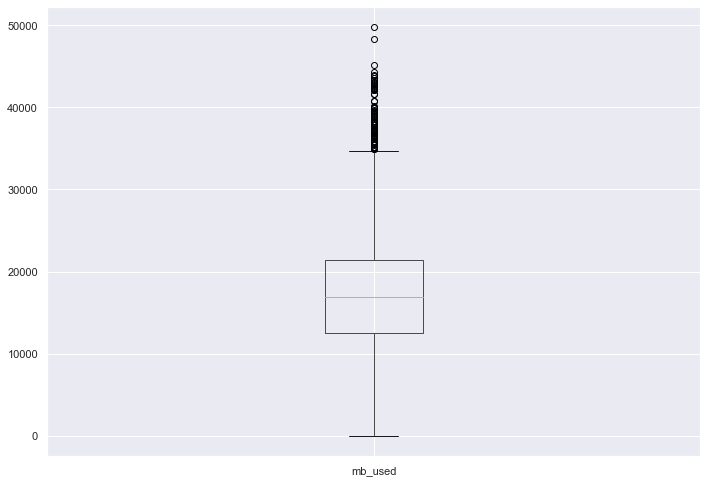

In [12]:
internet_pivot_table.boxplot('mb_used')
display(internet_pivot_table.query('mb_used!=0').mb_used.describe())

**Вывод** Среднее значение израсходванного интернет-трафика находится рядом с  медианным, это говотрит о том , что значения распределены достаточно равномерно. В среднем,  клиенты  "съедают" 17 гб трафиика ежемесячно.

##### Динамика израсходованного интернет-трафика по месяцам

C:\Users\Integro\AppData\Local\Temp/ipykernel_11292/323000160.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x/1000) + 'ГБ' for x in ax.get_yticks()])


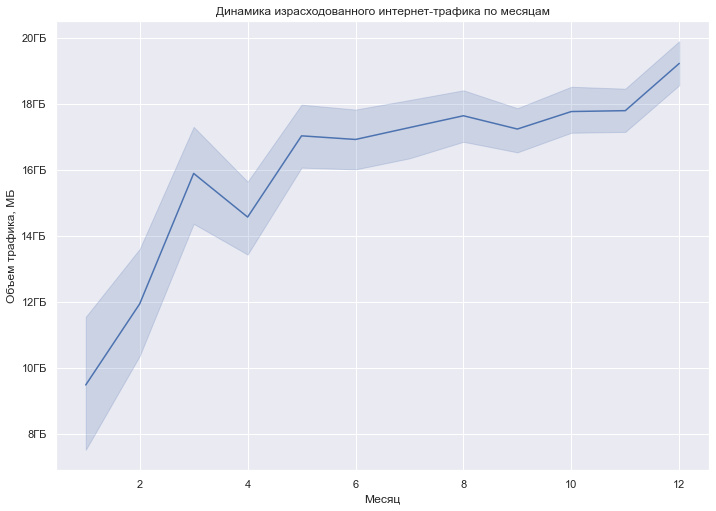

In [13]:
ax=sns.lineplot(data=internet_pivot_table.reset_index(), x='month_session_date', y="mb_used")# медианноное значние потребление траффика клиетом
ax.set_title('Динамика израсходованного интернет-трафика по месяцам')
ax.set_ylabel('Объем трафика, МБ')
ax.set_xlabel('Месяц')
ax.set_yticklabels(['{:,.0f}'.format(x/1000) + 'ГБ' for x in ax.get_yticks()])
plt.show()

**Вывод** начиная с начала 2018 года потребление интернет - трафика возросло почти в  два раза.

#### Расчет выручки исходя из объема израсходованного интернет-трафика по месяцам

In [14]:
#  функция, которая  удовлетворяет условию общая сумма за месяц округляется в бо́льшую сторону, к примеру, если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
def profit_internet (mb_per_month_included,mb_used_roundTogb,rub_per_gb):
    if  mb_used_roundTogb - mb_per_month_included >0:
        return math.ceil(( mb_used_roundTogb - mb_per_month_included)/1024)*rub_per_gb
    else:
        return 0

In [15]:
print(profit_internet(15360,24127,200))#Проверка работы  функии    

1800


In [16]:
internet_pivot_table_profit = internet_df.groupby(['month_session_date','user_id']).agg ({'mb_used':'sum'})
internet_pivot_table_profit = internet_pivot_table.reset_index().merge(users_df, how="left", on ="user_id",indicator= True)
internet_pivot_table_profit = internet_pivot_table_profit.merge(tariffs_df, how = "outer",  on ="tariff")
internet_pivot_table_profit['profit_internet'] = internet_pivot_table_profit.apply(lambda x: profit_internet(x.mb_per_month_included,x.mb_used,x.rub_per_gb),axis=1)
internet_pivot_table_profit['id_month_user'] = internet_pivot_table_profit['month_session_date'].astype(str)+internet_pivot_table_profit['user_id'].astype(str)#создам индентификатор месяц+ID клиента 
# internet_pivot_table_profit
# Соберем все в  одну таблицу

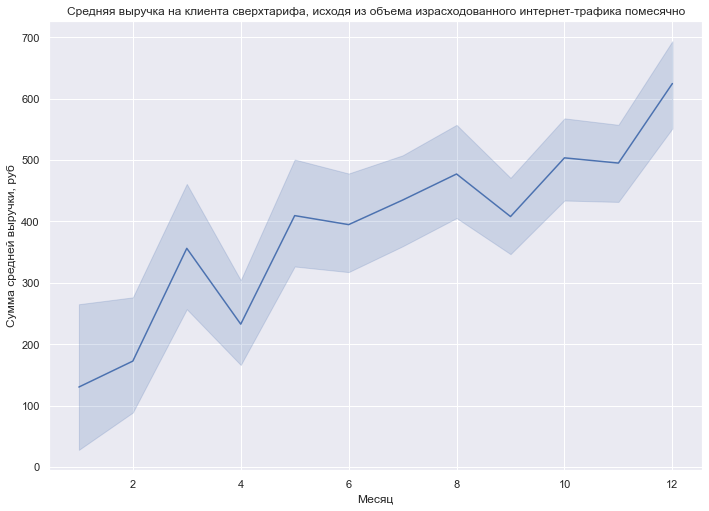

In [17]:
ax= sns.lineplot(data=internet_pivot_table_profit, x='month_session_date', y="profit_internet")
ax.set_title('Средняя выручка на клиента сверхтарифа, исходя из объема израсходованного интернет-трафика помесячно')
ax.set_ylabel('Сумма средней выручки, руб')
ax.set_xlabel('Месяц')
plt.show()   

**Вывод:**  Выручка от потребления интернет-трафика растет и это естественно, ведь растет его потребление 

#### оценка количество сделанных звонков и израсходованных минут разговора по месяцам

In [18]:
calls_df['month_session_date'] = calls_df['call_date'].dt.month #добавим столбец с номером месяца

In [19]:
calls_df['duration_round'] = calls_df['duration'].apply(lambda x: math.ceil(x))# создам столбец для исполнения треботвания "Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минут"

In [20]:
calls_pivot_table = calls_df.pivot_table(index=['month_session_date','user_id'], values='duration', aggfunc='sum')#сведем таблицу

count   3 174.00
mean      431.25
std       224.91
min         0.00
25%       273.84
50%       420.72
75%       558.60
max     1 578.06
Name: duration, dtype: float64

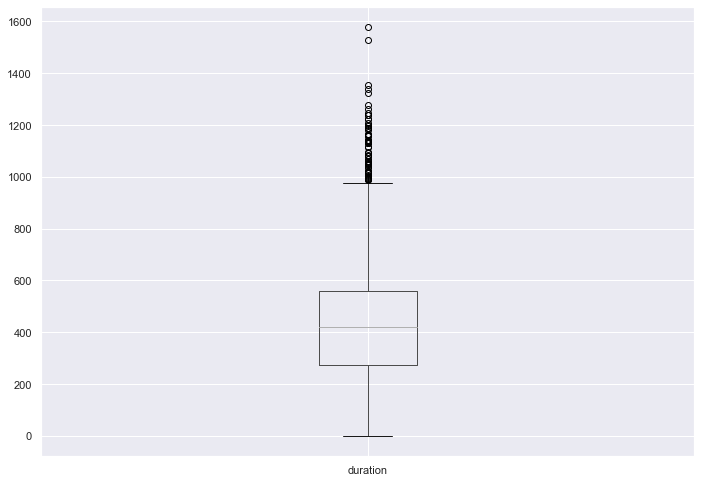

In [21]:
calls_pivot_table.boxplot('duration')#посмотрим распрделение графически
calls_pivot_table.duration.describe() #посмотрим распрделение на цифрах


 **Вывод:** В среднем, люди разговаривают почти на 430 минут в месяц. По графику также видно, что люди стали больше общаться

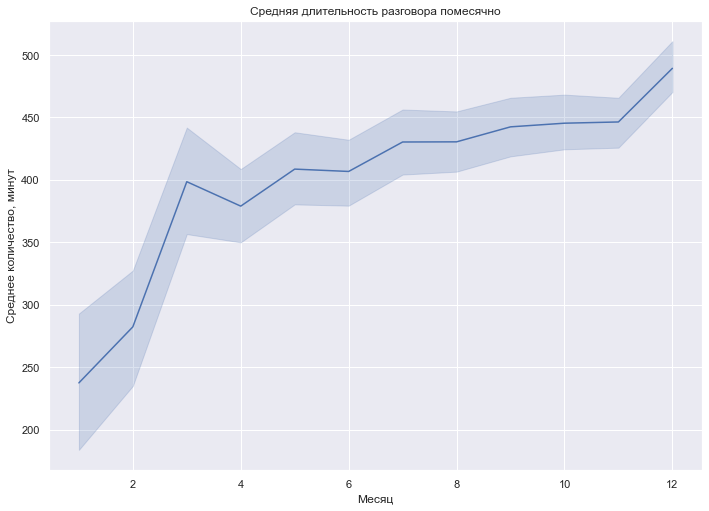

In [22]:
ax = sns.lineplot(data=calls_pivot_table.reset_index(), x='month_session_date', y="duration")
ax.set_title('Средняя длительность разговора помесячно')
ax.set_ylabel('Среднее количество, минут')
ax.set_xlabel('Месяц')
plt.show()  

 **Вывод** наблюдается рост среднего значения длительности разговор в течение 2018г, а также рост числа клиентов в выборке.

In [23]:
# функция расчета выручки минут
def profit_minutes (duration_round,minutes_included,rub_per_minute):
    if  duration_round - minutes_included>0:
        return (duration_round - minutes_included)*rub_per_minute
    else:
        return 0

In [24]:
calls_pivot_table_profit = calls_df.groupby(['month_session_date','user_id']).agg ({'duration_round':'sum'})
calls_pivot_table_profit = calls_pivot_table_profit.reset_index().merge(users_df, how="left", on ="user_id",indicator= True)
calls_pivot_table_profit = calls_pivot_table_profit.merge(tariffs_df, how = "left",  on ="tariff")
calls_pivot_table_profit['profit_calls'] = calls_pivot_table_profit.apply(lambda x: profit_minutes(x.duration_round,x.minutes_included,x.rub_per_minute),axis=1)
calls_pivot_table_profit['id_month_user'] = calls_pivot_table_profit['month_session_date'].astype(str)+calls_pivot_table_profit['user_id'].astype(str)#создам индентификатор месяц+ID клиента 
# calls_pivot_table_profit

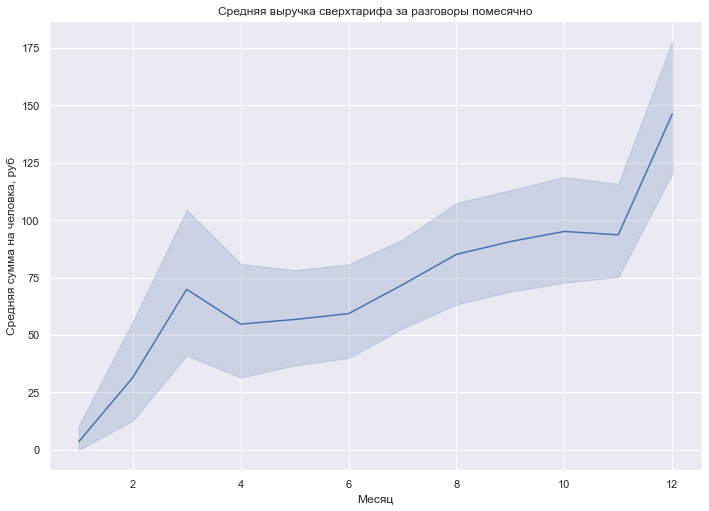

In [25]:
ax = sns.lineplot(data=calls_pivot_table_profit, x='month_session_date', y="profit_calls") 
ax.set_title('Средняя выручка сверхтарифа за разговоры помесячно')
ax.set_ylabel('Средняя сумма на человка, руб')
ax.set_xlabel('Месяц')
plt.show()  

In [26]:
# calls_pivot_table_profit[['month_session_date','profit_calls']].groupby('month_session_date').agg({'mean','count'})

**Вывод:**  В среднем люди разговаривают почти на 430 минут в месяц. Средняя дополнительная выручка также выросла.

#### оценка количества отправленных сообщений по месяцам

In [27]:
messages_df['month_message_date'] = messages_df['message_date'].dt.month #добавим столбец с номером месяца

In [28]:
messages_pivot_table = messages_df.pivot_table(index=['month_message_date','user_id'], values='id', aggfunc='count').astype('int16')

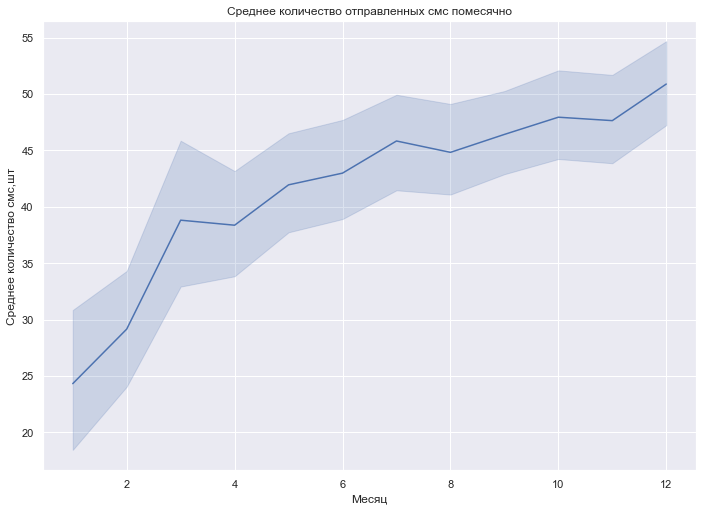

In [29]:
ax = sns.lineplot(data=messages_pivot_table.reset_index(), x='month_message_date', y="id")
ax.set_title('Среднее количество отправленных смс помесячно')
ax.set_ylabel('Среднее количество смс,шт')
ax.set_xlabel('Месяц')
plt.show()  

**Вывод:** В среднем  клиенты  используют 45 смс в месяц. Количество исползьованных смс растет в 2018, в соответствии  с появлением новых клиентов в выборке.

In [30]:
# функция расчета выручки смс
def profit_message (id,messages_included,rub_per_message):
    if  id - messages_included>0:
        return (id - messages_included)*rub_per_message
    else:
        return 0

In [31]:
message_pivot_table_profit = messages_df.groupby(['month_message_date','user_id']).agg ({'id':'count'})
message_pivot_table_profit = message_pivot_table_profit.reset_index().merge(users_df, how="left", on ="user_id",indicator= True)
message_pivot_table_profit = message_pivot_table_profit.merge(tariffs_df, how = "outer",  on ="tariff")
message_pivot_table_profit['profit_message'] = message_pivot_table_profit.apply(lambda x: profit_message(x.id,x.messages_included,x.rub_per_message),axis=1)
message_pivot_table_profit['id_month_user'] = message_pivot_table_profit['month_message_date'].astype(str)+message_pivot_table_profit['user_id'].astype(str)#создам индентификатор месяц+ID клиента 
# message_pivot_table_profit


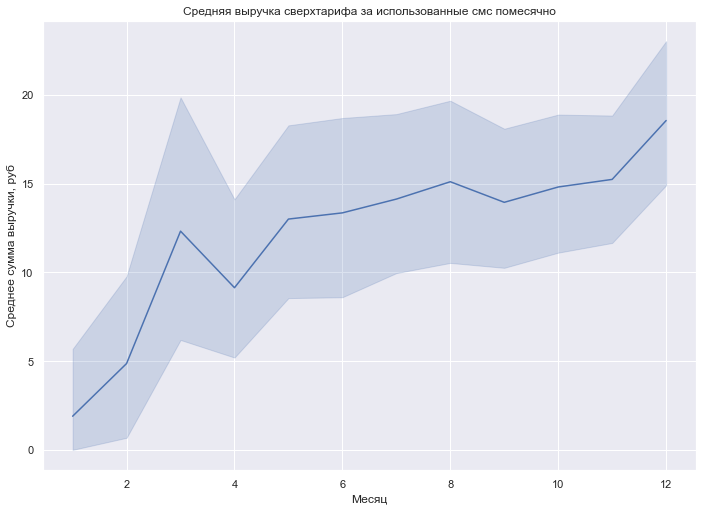

In [32]:
ax = sns.lineplot(data=message_pivot_table_profit, x='month_message_date', y="profit_message")
ax.set_title('Средняя выручка сверхтарифа за использованные смс помесячно')
ax.set_ylabel('Среднее сумма выручки, руб')
ax.set_xlabel('Месяц')
plt.show()  


**Вывод:** Дополнительная выручка , не входящая в пакеты по тарифам, от продажи смс не столь велика , по сравнению с выручкой от продажи интернет трафика.  

### Оценка общей выручки с каждого пользователя и тарифа
Для оценки общей выручки иcпользуемый метод:
1. вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика 
2. остаток умножим на значение из тарифного плана
3. прибавим абонентскую плату, соответствующую тарифному плану.

In [33]:
internet_pivot_table = internet_df.pivot_table(index=['month_session_date','user_id'], values='mb_used', aggfunc='sum').reset_index().astype('int32')# создание таблицы по исползованию интернет -трафика месяц+ид юзера
calls_pivot_table = calls_df.pivot_table(index=['month_session_date','user_id'], values='duration_round', aggfunc='sum').reset_index()# создание таблицы по длительности разговоров месяц+ид юзера
messages_pivot_table = messages_df.pivot_table(index=['month_message_date','user_id'], values='id', aggfunc='count').reset_index().astype('int16') # создание таблицы по исползованию смс месяц+ид юзера

messages_pivot_table['id_month_user'] = messages_pivot_table['user_id'].astype(str)+ messages_pivot_table['month_message_date'].astype(str) #создание индентификатора ИД юзера плюс месяц
internet_pivot_table['id_month_user'] = internet_pivot_table['user_id'].astype(str)+internet_pivot_table['month_session_date'].astype(str) #создание индентификатора ИД юзера плюс месяц
calls_pivot_table['id_month_user'] = calls_pivot_table['user_id'].astype(str)+calls_pivot_table['month_session_date'].astype(str) #создание индентификатора ИД юзера плюс месяц

total_pivot_table = internet_pivot_table.merge(calls_pivot_table, how= 'outer', on ='id_month_user').merge(
    messages_pivot_table, how= 'outer', on ='id_month_user')# слияние все в одну таблицу интернет+смс+звонки

total_pivot_table = total_pivot_table.drop(columns=['month_session_date_x','user_id_x'])
total_pivot_table

,mb_used,id_month_user,month_session_date_y,user_id_y,duration_round,month_message_date,user_id,id
0,2 727.00,10051,1.00,1 005.00,95.00,1.00,1 005.00,7.00
1,24 127.00,10321,1.00,1 032.00,380.00,1.00,1 032.00,38.00
2,2 346.00,10451,1.00,1 045.00,9.00,1.00,1 045.00,5.00
3,17 090.00,10551,1.00,1 055.00,551.00,1.00,1 055.00,30.00
4,15 604.00,10711,1.00,1 071.00,194.00,1.00,1 071.00,16.00
...,...,...,...,...,...,...,...,...
3209,NaN,14468,8.00,1 446.00,50.00,8.00,1 446.00,1.00
3210,NaN,12739,9.00,1 273.00,223.00,9.00,1 273.00,32.00
3211,NaN,127310,10.00,1 273.00,315.00,10.00,1 273.00,35.00
3212,NaN,127311,11.00,1 273.00,272.00,11.00,1 273.00,29.00


In [34]:
total_pivot_table[['duration_round','id','mb_used']]=total_pivot_table[['duration_round','id','mb_used']].fillna(0)# замена пустых значений по длительности разговора,интернет,СМС  на нуль.
# total_pivot_table[total_pivot_table['user_id_y'].isna()]
total_pivot_table['new_id'] = total_pivot_table.id_month_user.apply(lambda x: x[0:4]).astype('int64')#Выделение идюзера из месяца
total_pivot_table

,mb_used,id_month_user,month_session_date_y,user_id_y,duration_round,month_message_date,user_id,id,new_id
0,2 727.00,10051,1.00,1 005.00,95.00,1.00,1 005.00,7.00,1005
1,24 127.00,10321,1.00,1 032.00,380.00,1.00,1 032.00,38.00,1032
2,2 346.00,10451,1.00,1 045.00,9.00,1.00,1 045.00,5.00,1045
3,17 090.00,10551,1.00,1 055.00,551.00,1.00,1 055.00,30.00,1055
4,15 604.00,10711,1.00,1 071.00,194.00,1.00,1 071.00,16.00,1071
...,...,...,...,...,...,...,...,...,...
3209,0.00,14468,8.00,1 446.00,50.00,8.00,1 446.00,1.00,1446
3210,0.00,12739,9.00,1 273.00,223.00,9.00,1 273.00,32.00,1273
3211,0.00,127310,10.00,1 273.00,315.00,10.00,1 273.00,35.00,1273
3212,0.00,127311,11.00,1 273.00,272.00,11.00,1 273.00,29.00,1273


In [35]:
total_pivot_table=total_pivot_table.merge(users_df,  left_on ='new_id',right_on = 'user_id').merge(tariffs_df,how= 'inner', on ='tariff')
total_pivot_table# нечего не потерялось строк 3214, цепляем юзеров и тариф

,mb_used,id_month_user,month_session_date_y,user_id_y,duration_round,month_message_date,user_id_x,id,new_id,user_id_y,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,2 727.00,10051,1.00,1 005.00,95.00,1.00,1 005.00,7.00,1005,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
1,7 383.00,10052,2.00,1 005.00,456.00,2.00,1 005.00,38.00,1005,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
2,11 104.00,10053,3.00,1 005.00,606.00,3.00,1 005.00,56.00,1005,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
3,9 351.00,10054,4.00,1 005.00,712.00,4.00,1 005.00,41.00,1005,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
4,7 865.00,10055,5.00,1 005.00,595.00,5.00,1 005.00,42.00,1005,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,50,15360,500,550,200,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,0.00,12738,8.00,1 273.00,253.00,8.00,1 273.00,41.00,1273,1273,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
3210,0.00,12739,9.00,1 273.00,223.00,9.00,1 273.00,32.00,1273,1273,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
3211,0.00,127310,10.00,1 273.00,315.00,10.00,1 273.00,35.00,1273,1273,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
3212,0.00,127311,11.00,1 273.00,272.00,11.00,1 273.00,29.00,1273,1273,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1


In [36]:
# функция замены отсутствующих месяцев
def is_missing(month_session_date_y,month_message_date):    
    if np.isnan(month_session_date_y):        
        return month_message_date
    else:
        return month_session_date_y

In [37]:
# total_pivot_table[total_pivot_table['rub_per_minute'].isna()]# првоерка

In [38]:
total_pivot_table['profit_calls'] = total_pivot_table.apply(lambda x: profit_minutes(x.duration_round,x.minutes_included,x.rub_per_minute),axis=1)
total_pivot_table['profit_internet'] = total_pivot_table.apply(lambda x: profit_internet(x.mb_per_month_included,x.mb_used,x.rub_per_gb),axis=1)
total_pivot_table['profit_message'] = total_pivot_table.apply(lambda x: profit_message(x.id,x.messages_included,x.rub_per_message),axis=1)
total_pivot_table['total_profit'] = total_pivot_table.rub_monthly_fee + total_pivot_table.profit_internet + total_pivot_table.profit_calls  + total_pivot_table.profit_message  
total_pivot_table['month_session_date_y'] = total_pivot_table.apply(lambda x: is_missing(x.month_session_date_y,x.month_message_date),axis=1)#замена отсутствующих мес

# добавлены столбцы по расчету выручки

In [39]:
# total_pivot_table[total_pivot_table['month_session_date_y'].isna()]

In [40]:
total_pivot_table_profit = total_pivot_table[['month_session_date_y','total_profit','tariff']] # создал таблицу по выручке для построения графиков
# total_pivot_table_profit.month_session_date_y = np.where(total_pivot_table_profit.month_session_date_y.isnull(), total_pivot_table_profit.month_message_date, total_pivot_table_profit.month_session_date_y)
# total_pivot_table_profit[total_pivot_table_profit['month_session_date_y'].isna()]


### Посторим график средней выручки на клиента в  завиcимости канала (смс,звонки,интернет)

In [41]:
x= total_pivot_table_profit.groupby('tariff').agg({'total_profit':'sum'})
x['total_profit_%%']=total_pivot_table_profit.groupby('tariff').agg({'total_profit':'sum'})/total_pivot_table_profit.total_profit.sum()
x

,total_profit,total_profit_%%
tariff,,
smart,2 875 351.00,0.59
ultra,2 039 100.00,0.41


Почти 60% клиентов в выборке приходится на тариф smart и 40% на ultra

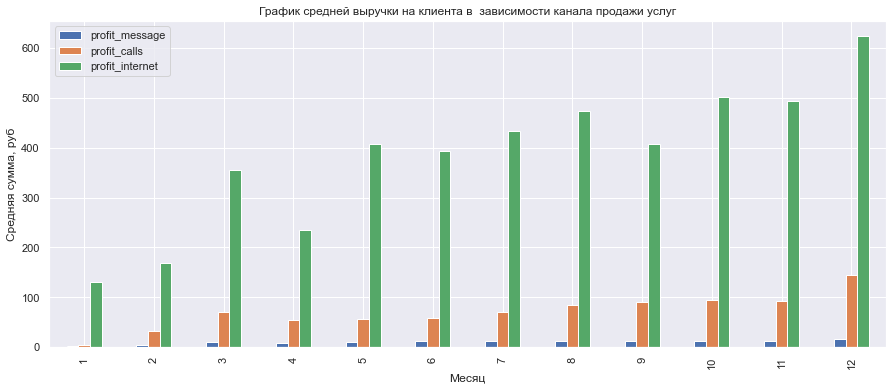

In [42]:
x_name  = ['янв','фев','мар','апр','май','июн','июл','авг','сен','окт','ноя','дек']
ax = total_pivot_table[['month_session_date_y','profit_internet','profit_calls','profit_message']].pivot_table(
index= 'month_session_date_y',aggfunc = 'mean').reset_index().plot(x="month_session_date_y", y=["profit_message", "profit_calls","profit_internet"], kind="bar",figsize=(15, 6),legend=True)
ax.set_title('График средней выручки на клиента в  завиcимости канала продажи услуг')
ax.set_ylabel('Средняя сумма, руб')
ax.set_xlabel('Месяц')
ax.set_xticklabels(['{:,.0f}'.format(x+1) for x in ax.get_xticks()])
# ax.set_xticklabels(x_name)
plt.show()  

**Вывод**  
- первое  место и  наибольший валовый доход сверх платы тарифа приносит продажа интернет-трафика,  также  это подтверждается ростом почти в два раза среднего потребления на  человека в течение 2018 года , примерно, с 10 гб до 19 гб на человека.
- второе место по валовой выручке дают клиенты, которые используют количество минут сверх установленного лимита , включенного в абонетскую, правда их валовый доход в 6 раз меньше чем за потребление интернета.
- третье почетное местодостается плата за смс сверх тарифа.


##### Проверка распределения клиентов в рамках тарифа

In [43]:
total_pivot_table.groupby('tariff').agg({'new_id': 'count'})/len(total_pivot_table)

,new_id
tariff,
smart,0.69
ultra,0.31


**Вывод** пользователей тарифа смарт больше и составляет около 70%

### Оценка прибыльности тарифа Smart и Ultra

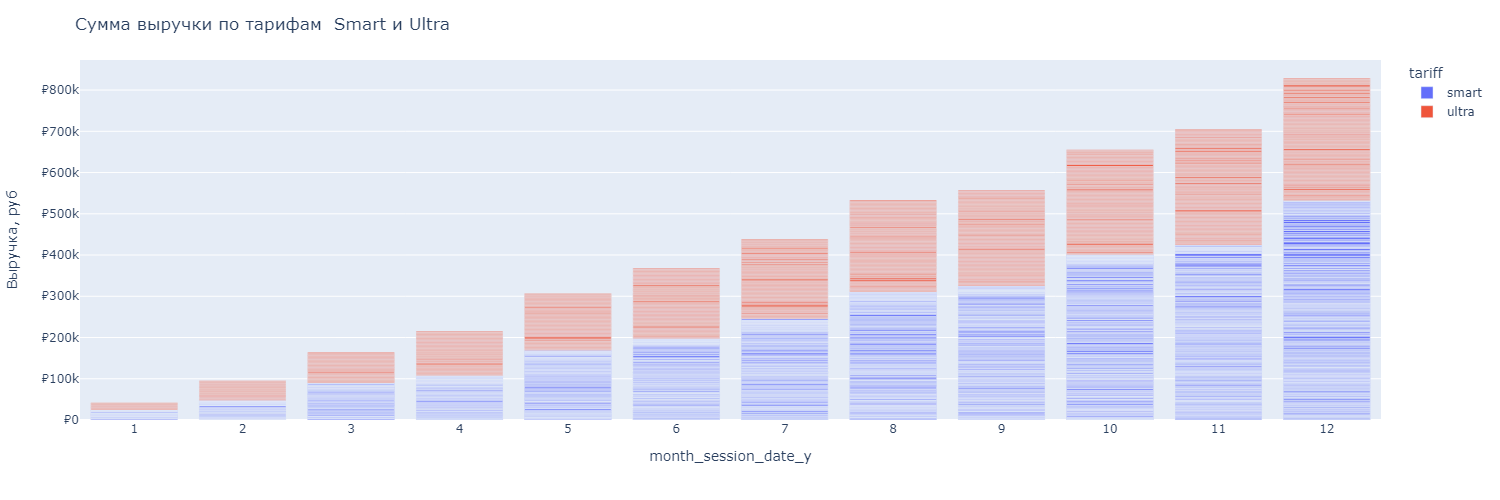

In [44]:
fig = px.bar(total_pivot_table_profit,x ='month_session_date_y', y = 'total_profit', color = 'tariff',width=1500, height=500,
             labels=dict(month_session_date="Месяц", total_profit="Выручка, руб"))
fig.update_layout(title_text="Сумма выручки по тарифам  Smart и Ultra")
fig.update_yaxes(tickprefix="₽")
fig.update_xaxes(dtick=1)
fig.show('png')

**Вывод:** Победителем становится  тариф Smart, он в среднем на 47% приносит больше валовой  прибыли, опять - таки за счет  превышения потребления трафика сверх тарифа и большего количества клиентов.

### Оценка среднего чека тарифов Smart и Ultra

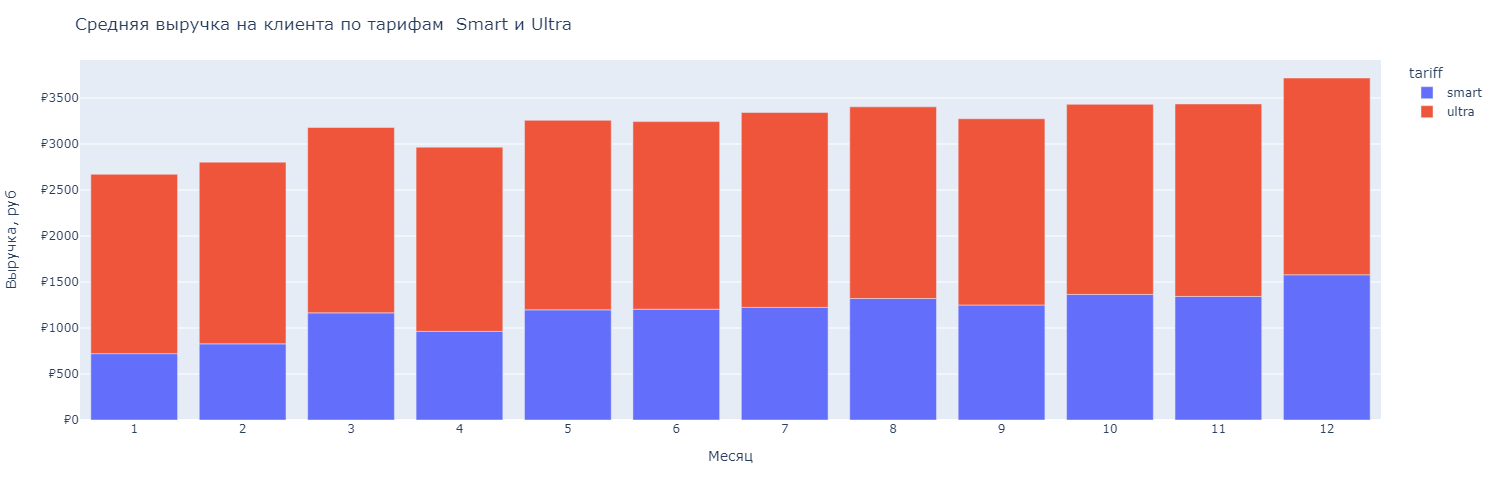

In [45]:
profit_final_table_tariff= total_pivot_table_profit.groupby(['month_session_date_y','tariff']).agg({'total_profit':'mean'})
# display(profit_final_table.groupby(['tariff']).agg({'total_profit':'mean'}))
fig = px.bar(profit_final_table_tariff.reset_index(),x ='month_session_date_y', y = 'total_profit', color = 'tariff',width=1500, height=500,
            labels=dict(month_session_date_y="Месяц", total_profit="Выручка, руб"))
fig.update_layout(title_text="Средняя выручка на клиента по тарифам  Smart и Ultra")
fig.update_yaxes(tickprefix="₽")
fig.update_xaxes(dtick=1)
fig.show('png')


**Вывод** В целом, можно сделать вывод , что в течение 2018 средний чек растет. Что на тарифе Smart почти в два раза, а на тарифе Ultra не так сильно , на 10%. Средний чек на тарифе Smart 1316 рублей, на Ultra 2097 рублей. Рост среднего чека  связан с ростом потребления  интернет -трафика

## Шаг 3. Анализ данных частотности

- Сколько минут разговора требуется пользователям каждого тарифа в месяц?
- Сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Оценим среднее количество, дисперсию и стандартное отклонение.

In [46]:
final_table = total_pivot_table[['duration_round','id','mb_used','tariff']]
final_table_smart = total_pivot_table[['duration_round','id','mb_used','tariff']].query('tariff =="smart"')
final_table_ultra = total_pivot_table[['duration_round','id','mb_used','tariff']].query('tariff =="ultra"')


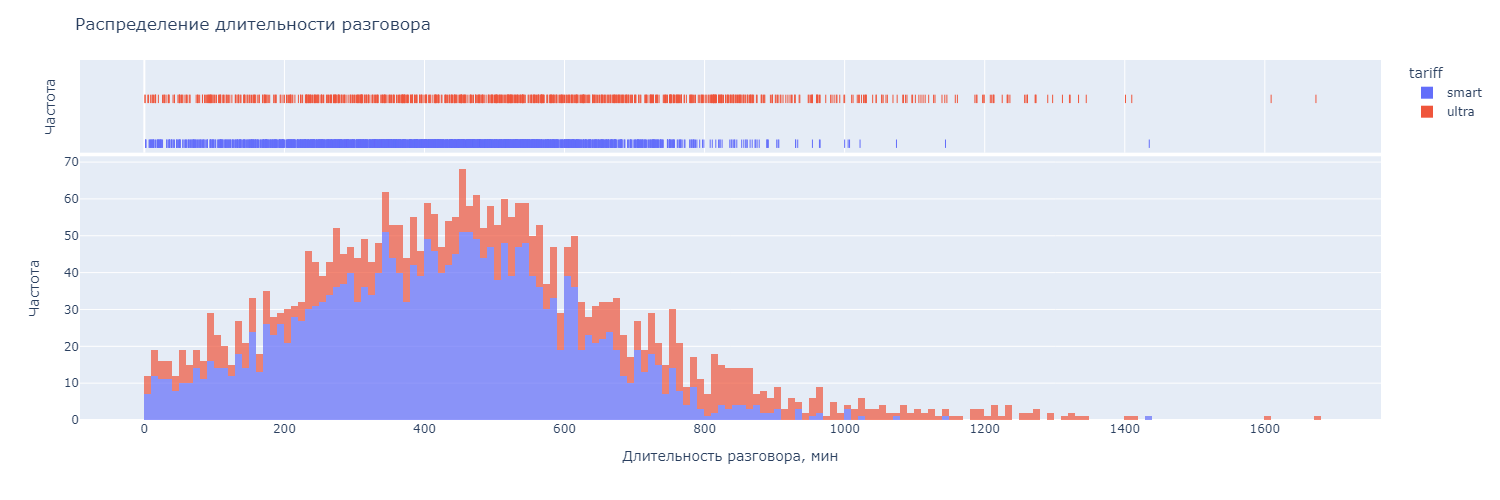

In [47]:

fig = px.histogram(final_table.query('duration_round!=0'), x="duration_round", color="tariff", marginal="rug",opacity = 0.7, hover_data=final_table.columns,nbins=200,width=1500, height=500,
                  labels=dict(duration_round="Длительность разговора, мин", count="Количество"))# убрал нули - всплески
fig.update_layout(title_text="Распределение длительности разговора",)
fig.update_yaxes(title='Частота')
fig.show('png')

In [48]:
mean_call_smart = final_table_smart.duration_round.mean()
variance_estimate_call_smart = np.var(final_table_smart.duration_round, ddof=1)
standard_deviation_call_smart = np.std(final_table_smart.duration_round, ddof=1)
mean_call_ultra = final_table_ultra.duration_round.mean()
variance_estimate_call_ultra = np.var(final_table_ultra.duration_round, ddof=1)
standard_deviation_call_ultra = np.std(final_table_ultra.duration_round, ddof=1)
rule_3_sigma_call_smart =standard_deviation_call_smart * 3
rule_3_sigma_call_ultra = standard_deviation_call_ultra *3

print('Тариф Smart \n')
print ('Среднее значение: {:.2f}'.format(mean_call_smart))
print ('Дисперсия: {:.2f}'.format(variance_estimate_call_smart))
print ('Стандартное отклонение: {:.2f} '.format(standard_deviation_call_smart))
print('Правило 3 сигм: {:.2f} \n '.format(rule_3_sigma_call_smart))
print('Тариф Ultra \n')
print ('Среднее значение: {:.2f}'.format(mean_call_ultra))
print ('Дисперсия: {:.2f}'.format(variance_estimate_call_ultra))
print ('Стандартное отклонение: {:.2f}'.format(rule_3_sigma_call_smart))
print('Правило 3 сигм: {:.2f} '.format(rule_3_sigma_call_ultra))

Тариф Smart 

Среднее значение: 417.93
Дисперсия: 36219.32
Стандартное отклонение: 190.31 
Правило 3 сигм: 570.94 
 
Тариф Ultra 

Среднее значение: 526.62
Дисперсия: 100873.63
Стандартное отклонение: 570.94
Правило 3 сигм: 952.82 


In [49]:
final_table.pivot_table(index='tariff',  
                 values=['duration_round', 'mb_used', 'id'], 
                 aggfunc=['mean', 'std', 'var']).T.style.format('{:.2f}')

In [50]:
List_1 = ['Среднее значение:','Дисперсия','Стандартное отклонение:','Правило 3 сигм:']
List_2 = [mean_call_smart,variance_estimate_call_smart,standard_deviation_call_smart,mean_call_ultra]
List_3 = [mean_call_ultra,variance_estimate_call_ultra,standard_deviation_call_ultra,rule_3_sigma_call_ultra]

print('Тариф Smart \n')
for x,y in zip(List_1,List_2):
    print (f'{x} {y:,.2f}')
print('\n Тариф Ultra \n')
for x,y in zip(List_1,List_3):
    print (f'{x} {y:,.2f}')

Тариф Smart 

Среднее значение: 417.93
Дисперсия 36,219.32
Стандартное отклонение: 190.31
Правило 3 сигм: 526.62

 Тариф Ultra 

Среднее значение: 526.62
Дисперсия 100,873.63
Стандартное отклонение: 317.61
Правило 3 сигм: 952.82


**Вывод:** 
1. Клиенты тарифа Смарт в среднем тратят 419 минут, но в 99,7 % клиентам требовалось до 988 минут, как предложение этим клиентам предложить сменить тарифный план.
2. Клинетам по тарифу Ультра почти всем 99,7 % хватило 1467 минут разговора, а это 24 часа, то есть клиентам нужно ,примерно, разговаривать сутки, чтобы наговориться в течение месяца, ну или решить деловые вопросы, у кого как.
3. Как предложение, подумать над тарифом для клиентов, которые разговаривают от 500-1000 минут в  месяц


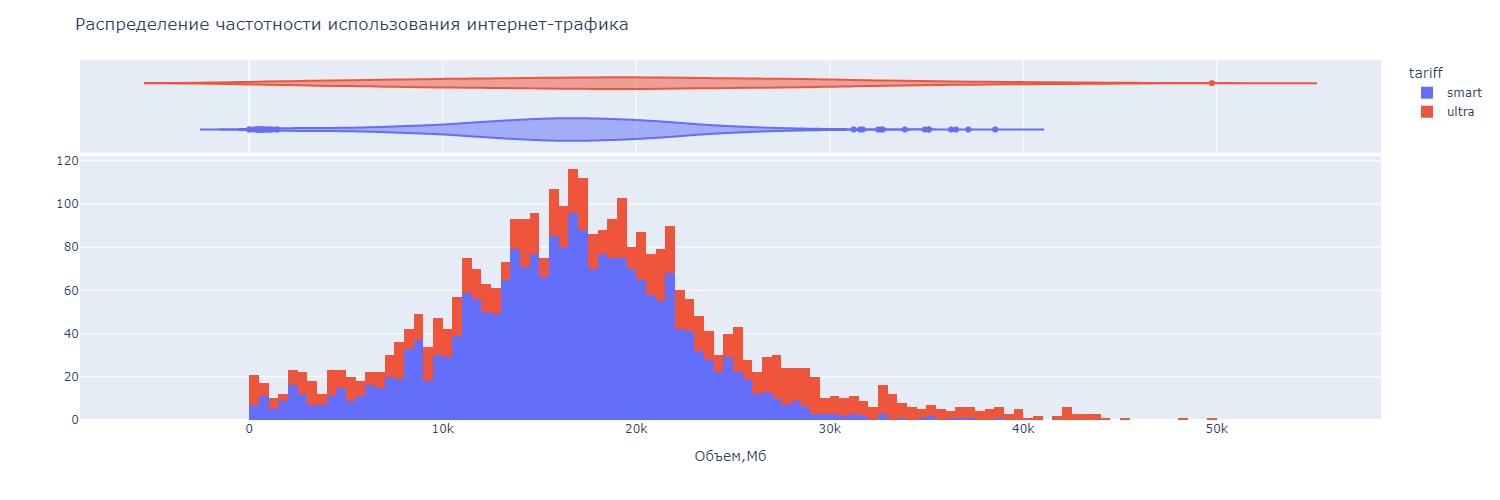

In [51]:
fig = px.histogram(final_table, x="mb_used", color="tariff", marginal="violin",nbins=200,hover_data=final_table.columns,width=1500, height=500,
                   labels=dict(mb_used="Объем,Мб ", count="Количество"))
fig.update_layout(title_text="Распределение частотности использования интернет-трафика")
fig.update_yaxes(title=None)
fig.show('png')

In [52]:
final_table

,duration_round,id,mb_used,tariff
0,95.00,7.00,2 727.00,smart
1,456.00,38.00,7 383.00,smart
2,606.00,56.00,11 104.00,smart
3,712.00,41.00,9 351.00,smart
4,595.00,42.00,7 865.00,smart
...,...,...,...,...
3209,253.00,41.00,0.00,ultra
3210,223.00,32.00,0.00,ultra
3211,315.00,35.00,0.00,ultra
3212,272.00,29.00,0.00,ultra


In [53]:
mean_internet_smart = final_table_smart.mb_used.mean()
variance_estimate_internet_smart = np.var(final_table_smart.mb_used, ddof=1)
standard_deviation_internet_smart = np.std(final_table_smart.mb_used, ddof=1)
mean_internet_ultra = final_table_ultra.mb_used.mean()
variance_estimate_internet_ultra = np.var(final_table_ultra.mb_used, ddof=1)
standard_deviation_internet_ultra = np.std(final_table_ultra.mb_used, ddof=1)
rule_3_sigma_smart =standard_deviation_internet_smart * 3
rule_3_sigma_ultra = standard_deviation_internet_ultra *3

print('Тариф Smart \n')
print ('Среднее значение: {:.2f}'.format(mean_internet_smart))
print ('Дисперсия: {:.2f}'.format(variance_estimate_internet_smart))
print ('Стандартное отклонение: {:.2f} '.format(standard_deviation_internet_smart))
print('Правило 3 сигм: {:.2f} \n '.format(rule_3_sigma_smart))
print('Тариф Ultra \n')
print ('Среднее значение: {:.2f}'.format(mean_internet_ultra))
print ('Дисперсия: {:.2f}'.format(variance_estimate_internet_ultra))
print ('Стандартное отклонение: {:.2f}'.format(standard_deviation_internet_ultra))
print('Правило 3 сигм: {:.2f} '.format(rule_3_sigma_ultra))


Тариф Smart 

Среднее значение: 16207.88
Дисперсия: 34462539.43
Стандартное отклонение: 5870.48 
Правило 3 сигм: 17611.44 
 
Тариф Ultra 

Среднее значение: 19468.33
Дисперсия: 101751093.97
Стандартное отклонение: 10087.17
Правило 3 сигм: 30261.52 


**Вывод:**
1. Сравнивая средние значения по  тарифам можно сказать, что клиенты на тарифе смарт потребляют на 21% интернет - трафика больше. В среднем 19.Гб на тарифе Ультра, против 16.2 ГБ на тарифе Смарт.
2. На тарифе Смарт интернет-потребности 99.7 %  клиентов покрываются до 33 ГБ использования интернет трафика
3. На тарифе Ультра интернет-потребности 99.7 %  клиентов покрываются до 49,6 ГБ использования интернет трафика


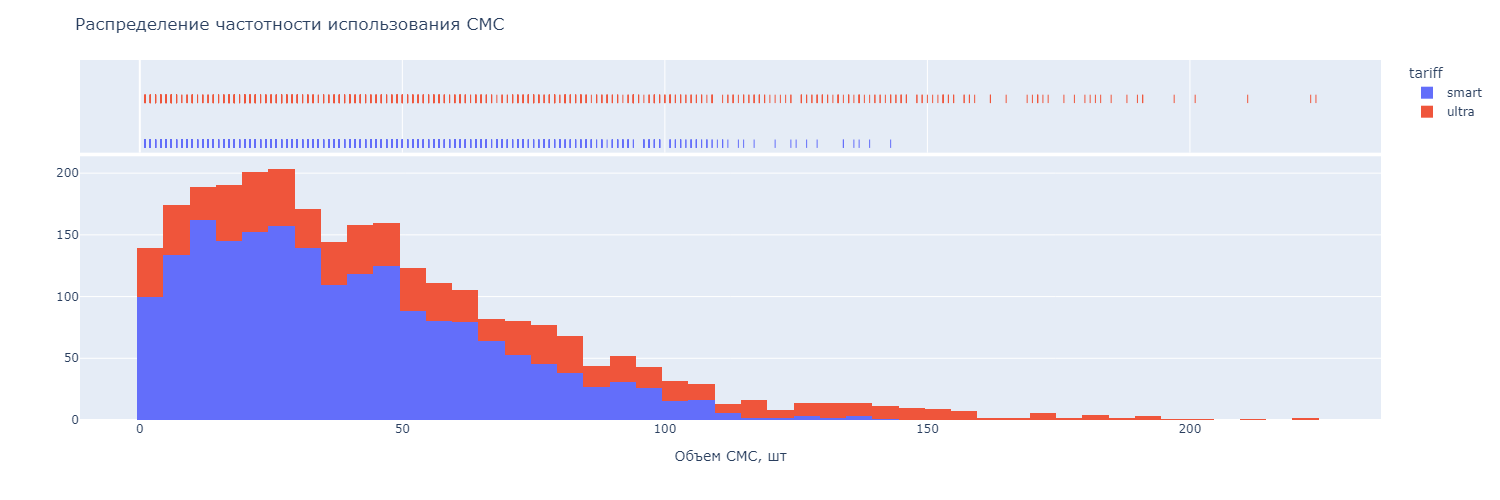

In [54]:
fig = px.histogram(final_table.query('id!=0'), x="id", color="tariff", marginal="rug",hover_data=final_table.columns,nbins=100,width=1500, height=500,
                                 labels=dict(id="Объем СМС, шт ", count="Количество"))
fig.update_layout(title_text="Распределение частотности использования СМС")
fig.update_yaxes(title=None)
fig.show('png')

In [55]:
mean_sms_smart = final_table_smart.id.mean()
variance_estimate_sms_smart = np.var(final_table_smart.id, ddof=1)
standard_deviation_sms_smart = np.std(final_table_smart.id, ddof=1)
rule_3_sigma_sms_smart =standard_deviation_sms_smart * 3

mean_sms_ultra = final_table_ultra.id.mean()
variance_estimate_sms_ultra = np.var(final_table_ultra.id, ddof=1)
standard_deviation_sms_ultra = np.std(final_table_ultra.id, ddof=1)
rule_3_sigma_sms_ultra = standard_deviation_sms_ultra *3

print('Тариф Smart \n')
print ('Среднее значение: {:.2f}'.format(mean_sms_smart))
print ('Дисперсия: {:.2f}'.format(variance_estimate_sms_smart))
print ('Стандартное отклонение: {:.2f}'.format(standard_deviation_sms_smart))
print('Правило 3 сигм: {:.2f} \n '.format(rule_3_sigma_sms_smart))
print('Тариф Ultra \n')
print ('Среднее значение: {:.2f}'.format(mean_sms_ultra))
print ('Дисперсия: {:.2f}'.format(variance_estimate_sms_ultra))
print ('Стандартное отклонение: {:.2f}'.format(standard_deviation_sms_ultra))
print('Правило 3 сигм: {:.2f} '.format(rule_3_sigma_sms_ultra))


Тариф Smart 

Среднее значение: 33.38
Дисперсия: 796.81
Стандартное отклонение: 28.23
Правило 3 сигм: 84.68 
 
Тариф Ultra 

Среднее значение: 49.36
Дисперсия: 2285.27
Стандартное отклонение: 47.80
Правило 3 сигм: 143.41 


**Вывод:** 
1. СМС в среднем тратят на тарифе Ультра и Смарт одно и тоже количество 45 шт в  мес., не так уж и много всего 1,5 смс в  день.
2. В 99,7% случаев клиентам в  месяц хватает 105 смс 


## Шаг 4. Проверка гипотез
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
2. средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов

Проверим превую гипотезу
- Основная гипотеза(H0) - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.
- Альтернативная гипотеза (H1) - средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны
Примем или отвергнем основное предположение
Ограничем долю ошибок первого рода, возьмем alpha= 0,05


In [56]:
sample_1 = total_pivot_table.query('tariff =="ultra"').groupby('new_id').agg({'total_profit':'sum'})
sample_1 = sample_1[['total_profit']]
sample_2 = total_pivot_table.query('tariff =="smart"').groupby('new_id').agg({'total_profit':'sum'})
sample_2 = sample_2[['total_profit']]
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: [2.5240851e-20]
Отвергаем нулевую гипотезу


Проверим вторую гипотезу
- Основная гипотеза (H0) - средняя выручка пользователей из Москвы равна выручке из других регионов. 
- Альтернативная гипотеза (H1) - средняя выручка пользователей из Москвы и других регионов различны.
Ограничем долю ошибок первого рода возьмем alpha= 0,05

In [57]:
sample_1 = total_pivot_table.query('city =="Москва"')
sample_1 = sample_1[['total_profit']]
sample_2 = total_pivot_table.query('city !="Москва"')
sample_2 = sample_2[['total_profit']]
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: [0.54401529]
Не получилось отвергнуть нулевую гипотезу


In [58]:
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 140 to 3190
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_profit  611 non-null    float64
dtypes: float64(1)
memory usage: 9.5 KB


## Шаг 5.общий вывод

1. С точки  зрения прибыльности наиболее доходным оказался тариф Smart , он в среднем на 47% приносит больше валовой прибыли. За счет того , что клиентов тарифа Smart состалвяет 70%, Ultra 30%, и это нормально ведь порог входа в тариф Ultra достаточно велик.
2. Течение 2018 средний чек растет.На тарифе Smart рост на 100%, а на тарифе Ultra на 10%. Средний чек за 2018 год на тарифе Smart 1316  рублей, на Ultra 2097 рублей. Рост среднего чека связан с ростом потребления интернет -трафика
3. Чтобы почти польностью удовлетвоить свои потребности в общении по телефону 95% клеинтам клиентам достаточно 660 минут, было 25 ГБ и 73 смс.
4. Гипотеза, что средняя выручка пользователей из Москвы ровна выручке из других регионов не получилось отвергнуть
5. Гипотеза, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны, не подтверждается.
